In [1]:
import pandas as pd
import env
import wrangle as w
import explore as exp
import visuals as vis
import model as mdl

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Example usage:
app_token = env.app_token
year_to_retrieve = '2022'
max_req = 2000  # Specify the maximum number of observations to retrieve

In [3]:
df = w.wrangle_coll_stage1(year_to_retrieve, app_token)

CSV file for 2022 already exists. Loading data from the CSV.


In [4]:
df.to_csv('preprocessed_df_v2.csv', index=False)

In [5]:
df.head()

,crash_datetime,crash_date,crash_time,collision_id,latitude,longitude,on_street_name,borough,zip_code,injuries_count,...,deaths,vehicle_1_category,vehicle_2_category,factors_category_vehicle_1,factors_category_vehicle_2,factors_subcat_vehicle_1,factors_subcat_vehicle_2,factors_subcat_vehicles,factors_category_vehicles,vehicles
0,2022-01-01 05:17:00,2022-01-01,05:17:00,4491857,40.746930,-73.84866,grand central pkwy,queens,11368,1,...,False,personal,personal,driver_related,driver_related,driving violations,driving violations,driving violations,driver_related,personal_to_personal
1,2022-01-01 01:30:00,2022-01-01,01:30:00,4491344,40.819157,-73.96038,henry hudson parkway,manhattan,10027,0,...,False,personal,personal,unspecified,unspecified,unspecified,unspecified,unspecified,unspecified,personal_to_personal
2,2022-01-01 16:40:00,2022-01-01,16:40:00,4491478,40.806107,-73.91799,saint ann's avenue,bronx,10454,0,...,False,personal,personal,unspecified,unspecified,unspecified,unspecified,unspecified,unspecified,personal_to_personal
3,2022-01-01 02:53:00,2022-01-01,02:53:00,4491586,40.646034,-73.99678,40th street,brooklyn,11232,0,...,False,personal,personal,unspecified,unspecified,unspecified,unspecified,unspecified,unspecified,personal_to_personal
4,2022-01-01 17:00:00,2022-01-01,17:00:00,4491660,40.701195,-73.91409,wyckoff avenue,brooklyn,11237,0,...,False,personal,personal,driver_related,unspecified,driving violations,unspecified,driving violations,driver_related,personal_to_personal


In [6]:
# Example usage:
info_dataframe = exp.create_info_dataframe(df)  # Assuming data_df is your DataFrame
info_dataframe

,Column,Null_Count,Null_Percentage,Zero_Count,Blank_Count,Unique_Values,Data_Type
0,crash_datetime,0,0.0,0,0,41429,datetime64[ns]
1,crash_date,0,0.0,0,0,365,datetime64[ns]
2,crash_time,0,0.0,0,0,1440,object
3,collision_id,0,0.0,0,0,48254,int64
4,latitude,0,0.0,0,0,23107,float64
5,longitude,0,0.0,0,0,19572,float64
6,on_street_name,0,0.0,0,0,4518,object
7,borough,1,0.0,0,0,5,object
8,zip_code,0,0.0,0,0,211,int64
9,injuries_count,0,0.0,32376,0,14,int64


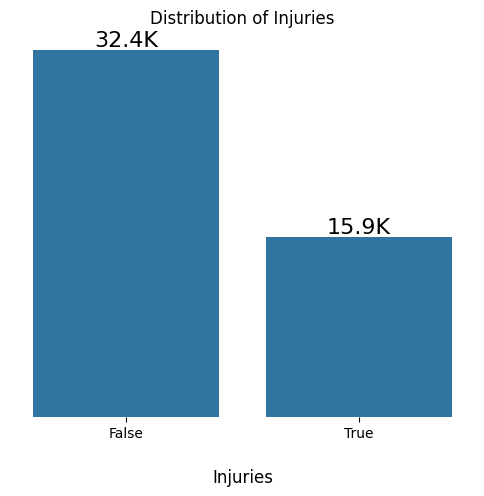

In [7]:
vis.injuries_dist(df)

### Vehicle Category
**Null Hypothesis**: The category of vehicles involved is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The category of vehicles involved is not independent of the occurrence of injuries in vehicle crashes.

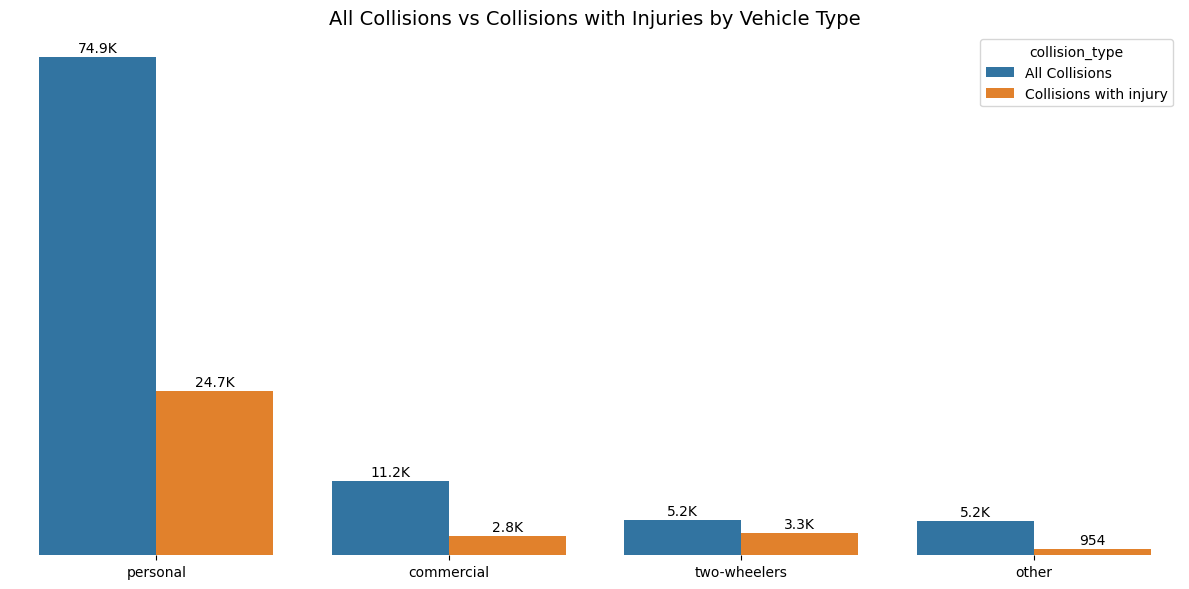

In [8]:
# Filter the dataframe to only include rows where 'injuries' is True
df_injuries = df[df['injuries']]
# Aggregate the data for vehicle_1_category and vehicle_2_category into a single Series for injuries
agg_data_vehicle_both = pd.concat([df_injuries['vehicle_1_category'], df_injuries['vehicle_2_category']], ignore_index=True)
agg_data_vehicle_both = agg_data_vehicle_both.value_counts().reset_index()
agg_data_vehicle_both.columns = ['vehicles', 'count_of_injuries']

# Aggregate the data for overall vehicle collisions for vehicle_1_category and vehicle_2_category into a single Series
agg_data_vehicle_overall = pd.concat([df['vehicle_1_category'], df['vehicle_2_category']], ignore_index=True)
agg_data_vehicle_overall = agg_data_vehicle_overall.value_counts().reset_index()
agg_data_vehicle_overall.columns = ['vehicles', 'count_of_collisions']

# Merge the overall collisions and collisions resulting in injuries dataframes on 'vehicles'
merged_data = pd.merge(agg_data_vehicle_overall, agg_data_vehicle_both, on='vehicles', how='outer').fillna(0)
merged_data.columns = ['vehicles', 'count_of_collisions', 'count_of_injuries']

# Melt the dataframe to long format for easier plotting
melted_data = pd.melt(merged_data, id_vars=['vehicles'], value_vars=['count_of_collisions', 'count_of_injuries'], 
                      var_name='collision_type', value_name='count')

# Update the collision types to more readable labels as specified
melted_data['collision_type'] = melted_data['collision_type'].map({
    'count_of_collisions': 'All Collisions', 
    'count_of_injuries': 'Collisions with injury'
})

# Use the customized_barplot_v4 function to plot the side-by-side bars within a single plot with updated aesthetics
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='vehicles', y='count', hue='collision_type', data=melted_data, errorbar=None)

# Remove y-axis and frame
ax.set(yticklabels=[])
ax.yaxis.set_ticks_position('none')
sns.despine(left=True, bottom=True)

# Add annotations to the bars
y_axis_height = ax.get_ylim()[1]
for p in ax.patches:
    if p.get_height() < 1000:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() + (y_axis_height * 0.01)),
                    ha='center', va='baseline', fontsize=10)
    else:
        ax.annotate(f'{p.get_height()/1000:.1f}K', (p.get_x() + p.get_width() / 2., p.get_height() + (y_axis_height * 0.01)),
                    ha='center', va='baseline', fontsize=10)

# Set labels and title
plt.title('All Collisions vs Collisions with Injuries by Vehicle Type', fontsize=14)
plt.xlabel('', labelpad=20, fontsize=12)
plt.ylabel('')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

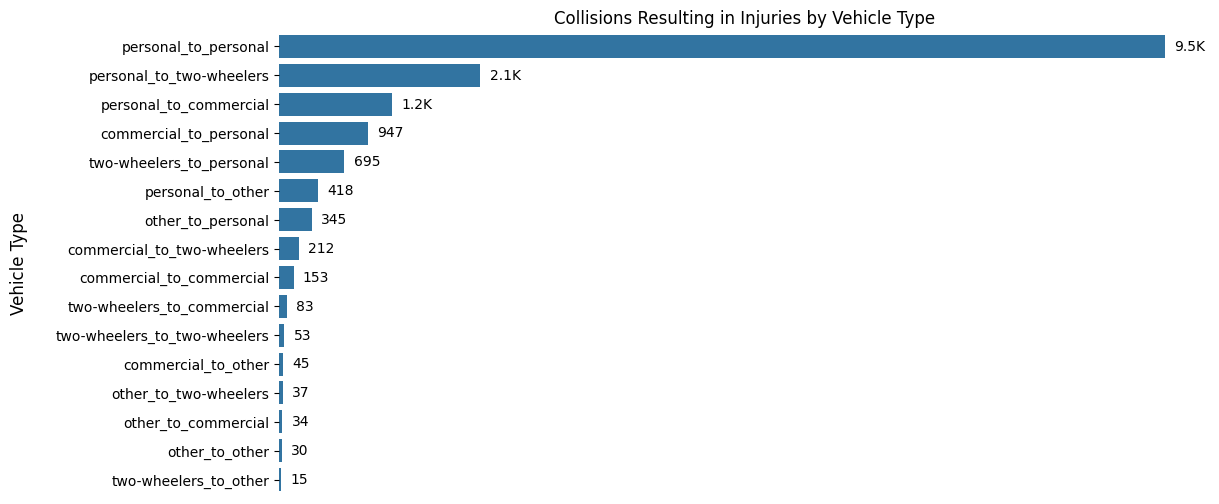

In [9]:
# Filter the dataframe to only include rows where 'injuries' is True
df_injuries = df[df['injuries']]

# Aggregate the data to get the count of crashes resulting in injuries by each type of vehicle
agg_data = df_injuries['vehicles'].value_counts().reset_index()
agg_data.columns = ['vehicles', 'count_of_injuries']

vis.customized_horizontal_barplot(x='count_of_injuries', y='vehicles', data=agg_data, 
                              title='Collisions Resulting in Injuries by Vehicle Type', 
                              ylabel='Vehicle Type', y_label_rotation=0, bar_font_size=10, figsize=(12, 6))

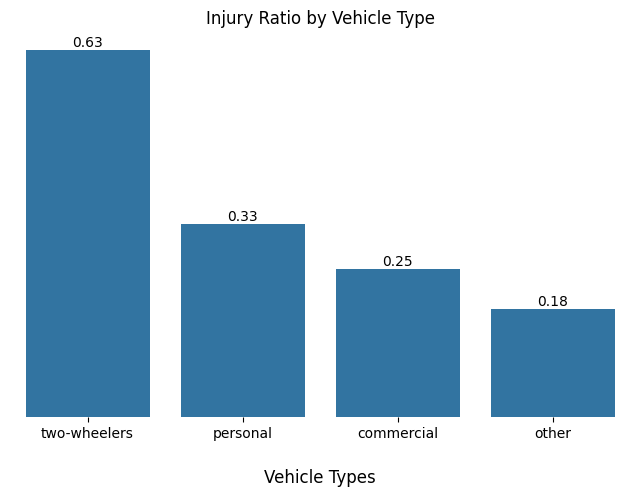

In [10]:
# Filter the DataFrame to only include rows where 'injuries_count' is greater than 0 (assuming this indicates injuries)
df_injuries = df[df['injuries_count'] > 0]

# Aggregate the data for 'vehicle_1_category' and 'vehicle_2_category' into a single Series for injuries
agg_data_vehicle_both_injuries = pd.concat([df_injuries['vehicle_1_category'], df_injuries['vehicle_2_category']], ignore_index=True)
agg_data_vehicle_both_injuries = agg_data_vehicle_both_injuries.value_counts().reset_index()
agg_data_vehicle_both_injuries.columns = ['vehicles', 'count_of_injuries']

# Aggregate the data for overall vehicle collisions for 'vehicle_1_category' and 'vehicle_2_category' into a single Series
agg_data_vehicle_both_overall = pd.concat([df['vehicle_1_category'], df['vehicle_2_category']], ignore_index=True)
agg_data_vehicle_both_overall = agg_data_vehicle_both_overall.value_counts().reset_index()
agg_data_vehicle_both_overall.columns = ['vehicles', 'count_of_collisions']

# Merge the overall collisions and collisions resulting in injuries dataframes on 'vehicles'
merged_data = pd.merge(agg_data_vehicle_both_overall, agg_data_vehicle_both_injuries, on='vehicles', how='outer').fillna(0)

# Calculate the injury ratio
merged_data['injury_ratio'] = merged_data['count_of_injuries'] / merged_data['count_of_collisions']


# Use the customized_barplot_v4 function to visualize the injury ratio
vis.customized_barplot_v4(x='vehicles', 
                      y='injury_ratio', 
                      data=merged_data, 
                      title='Injury Ratio by Vehicle Type', 
                      xlabel='Vehicle Types',
                      bar_font_size=10,
                      figsize=(8, 5), single_color="#1f77b4")

In [11]:
# Test the modified function with 'vehicle_1_category' and 'injuries'
print("Chi-Square Test for 'vehicles type' and 'injuries':")
exp.chi_square_test(df, 'injuries', 'vehicles')

Chi-Square Test for 'vehicles type' and 'injuries':
p-value: 0.0
r-value: 0.25

Interpretation:
Reject the null hypothesis.
The r-value suggests a medium effect size.


### Factor Category
**Null Hypothesis**: The contributing factors category is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The contributing factors category is not independent of the occurrence of injuries in vehicle crashes.

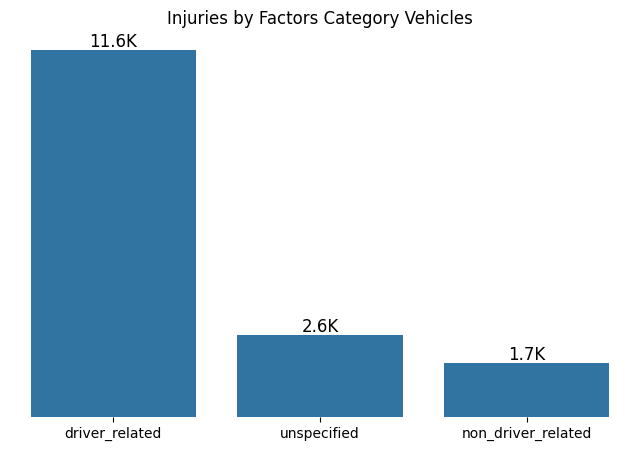

In [12]:
# Aggregate the data by 'factors_category_vehicles'
agg_factors_category_vehicles = df.groupby('factors_category_vehicles')['injuries'].sum().reset_index()

# Generate the plot for 'factors_category_vehicles'
vis.customized_barplot_v4(x='factors_category_vehicles', y='injuries', data=agg_factors_category_vehicles, 
                   title='Injuries by Factors Category Vehicles', xlabel='', 
                   x_label_rotation=0, bar_font_size=12, figsize=(8, 5), single_color="#1f77b4")

In [13]:
# Conduct and interpret Chi-Square Test for 'combined_factors_category' and 'injuries'
print("Chi-Square Test for 'factors_category_vehicles' and 'injuries':")
exp.chi_square_test(df, 'injuries', 'factors_category_vehicles')

Chi-Square Test for 'factors_category_vehicles' and 'injuries':
p-value: 1.8112836740328928e-28
r-value: 0.05

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


### Factors Subcategory
**Null Hypothesis**: The contributing factors subcategory is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The contributing factors subcategory is not independent of the occurrence of injuries in vehicle crashes.

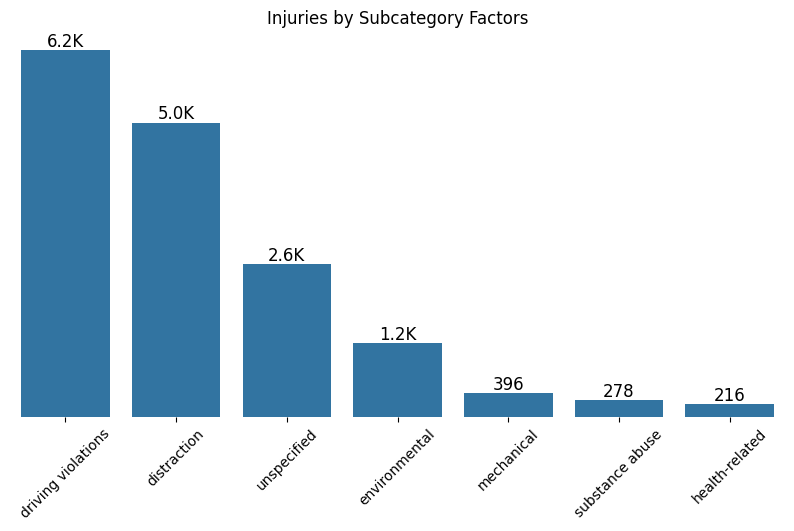

In [14]:
# Aggregate the data by 'factors_subcat_vehicles'
agg_factors_subcat_vehicles = df.groupby('factors_subcat_vehicles')['injuries'].sum().reset_index()

# Generate the plot for 'factors_subcat_vehicles'
vis.customized_barplot_v4(x='factors_subcat_vehicles', y='injuries', data=agg_factors_subcat_vehicles, 
                   title='Injuries by Subcategory Factors', xlabel='', 
                   x_label_rotation=45, bar_font_size=12, figsize=(10, 5), single_color="#1f77b4")


In [15]:
# Conduct and interpret Chi-Square Test for 'combined_factors_subcat' and 'injuries'
print("\nChi-Square Test for 'factors_subcat_vehicles' and 'injuries':")
exp.chi_square_test(df, 'injuries', 'factors_subcat_vehicles')



Chi-Square Test for 'factors_subcat_vehicles' and 'injuries':
p-value: 5.83672031133569e-46
r-value: 0.07

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


In [16]:
# Convert 'crash_datetime' to a datetime object
df['crash_datetime'] = pd.to_datetime(df['crash_datetime'])

# Extract time-based features from 'crash_datetime'
df['hour_of_day'] = df['crash_datetime'].dt.hour
df['day_of_week'] = df['crash_datetime'].dt.day_name()
df['month'] = df['crash_datetime'].dt.month_name()

# Create a 'daylight' column, set to True if the hour is between 06 and 19, otherwise False
df['daylight'] = (df['hour_of_day'] >= 6) & (df['hour_of_day'] <= 19)

# the 'daylight_day_of_week' column to use 'Day' and 'Night' instead of True and False
df['daylight_day_of_week'] = df['day_of_week'] + '_' + df['daylight'].map({True: 'Day', False: 'Night'})


### Hour of Day
**Null Hypothesis**: The hour of the day is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The hour of the day is not independent of the occurrence of injuries in vehicle crashes.


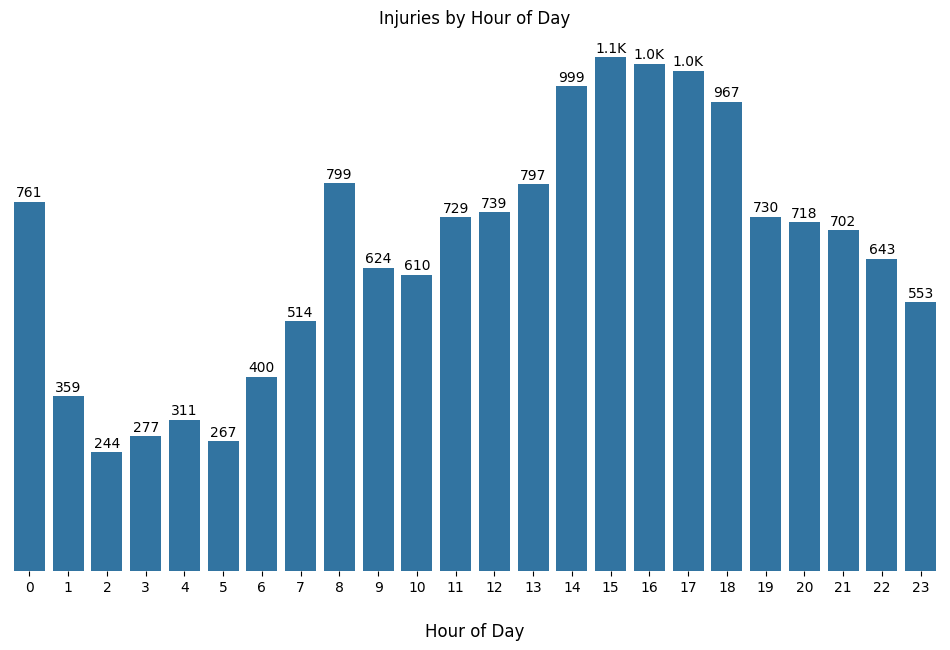

In [17]:
# Aggregate the data for the new time-based features
agg_hour_of_day = df.groupby('hour_of_day')['injuries'].sum().reset_index()




# Generate bar plots for the new features
vis.customized_barplot_v4(x='hour_of_day', y='injuries', data=agg_hour_of_day, 
                      title='Injuries by Hour of Day', xlabel='Hour of Day', 
                      x_label_rotation=0, bar_font_size=10, figsize=(12, 7), single_color="#1f77b4")


In [18]:

print("Chi-Square Test for 'hour_of_day':")
exp.chi_square_test(df, 'injuries', 'hour_of_day')


Chi-Square Test for 'hour_of_day':
p-value: 3.0065722439640336e-23
r-value: 0.06

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


### Day of Week
**Null Hypothesis**: The day of the week is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The day of the week is not independent of the occurrence of injuries in vehicle crashes.

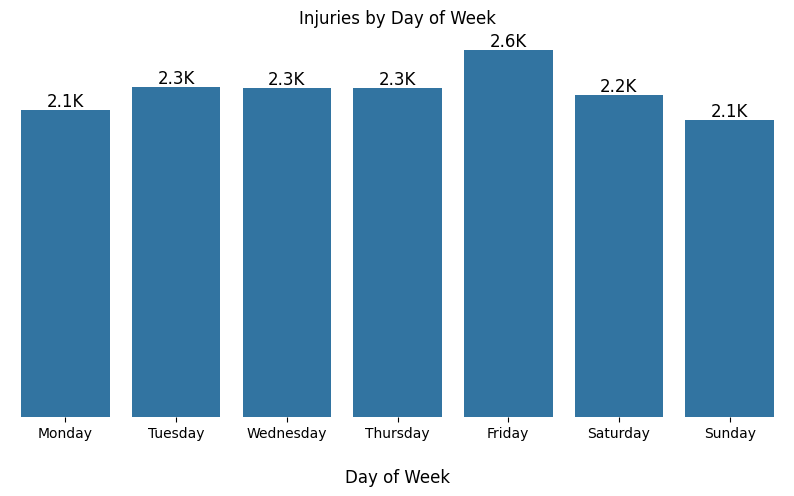

In [19]:
# If the 'day_of_week' column exists in your actual dataset, you would aggregate data as follows:
agg_day_of_week = df.groupby('day_of_week')['injuries'].sum().reset_index()

# Map days of the week to their corresponding numerical value for sorting
day_to_num = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# Add a 'day_num' column based on the mapping
agg_day_of_week['day_num'] = agg_day_of_week['day_of_week'].map(day_to_num)

# Sort the DataFrame based on 'day_num'
agg_day_of_week_sorted = agg_day_of_week.sort_values('day_num')

# Plot using customized_barplot_v5
vis.customized_barplot_v4(x='day_of_week', y='injuries', data=agg_day_of_week_sorted, 
                      title='Injuries by Day of Week', xlabel='Day of Week', 
                      sort_data=False, x_label_rotation=0, bar_font_size=12, figsize=(10, 5), single_color="#1f77b4")

In [20]:
print("\nChi-Square Test for 'day_of_week':")
exp.chi_square_test(df, 'injuries', 'day_of_week')



Chi-Square Test for 'day_of_week':
p-value: 0.07266814052507678
r-value: 0.02

Interpretation:
Fail to reject the null hypothesis.
The r-value suggests a small effect size.


### Daylight
**Null Hypothesis**: The presence of daylight is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The presence of daylight is not independent of the occurrence of injuries in vehicle crashes.

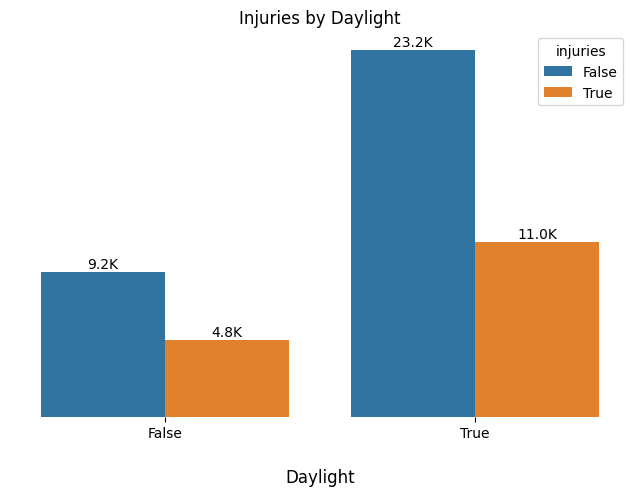

In [21]:
# Aggregate data to show injuries (True/False) by daylight (True/False)
agg_daylight = df.groupby(['daylight', 'injuries']).size().reset_index(name='count')

# Plot using the customized_barplot_v5 function
vis.customized_barplot_v4(x='daylight', y='count', data=agg_daylight, 
                      title='Injuries by Daylight', xlabel='Daylight', 
                      sort_data=False, x_label_rotation=0, bar_font_size=10, figsize=(8, 5),
                      hue='injuries')

In [22]:
print("\nChi-Square Test for 'daylight':")
exp.chi_square_test(df, 'injuries', 'daylight')



Chi-Square Test for 'daylight':
p-value: 1.43316788659377e-06
r-value: 0.02

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


### Daylight & Day of Week Combined
**Null Hypothesis**: The combination of daylight and day of the week is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The combination of daylight and day of the week is not independent of the occurrence of injuries in vehicle crashes.

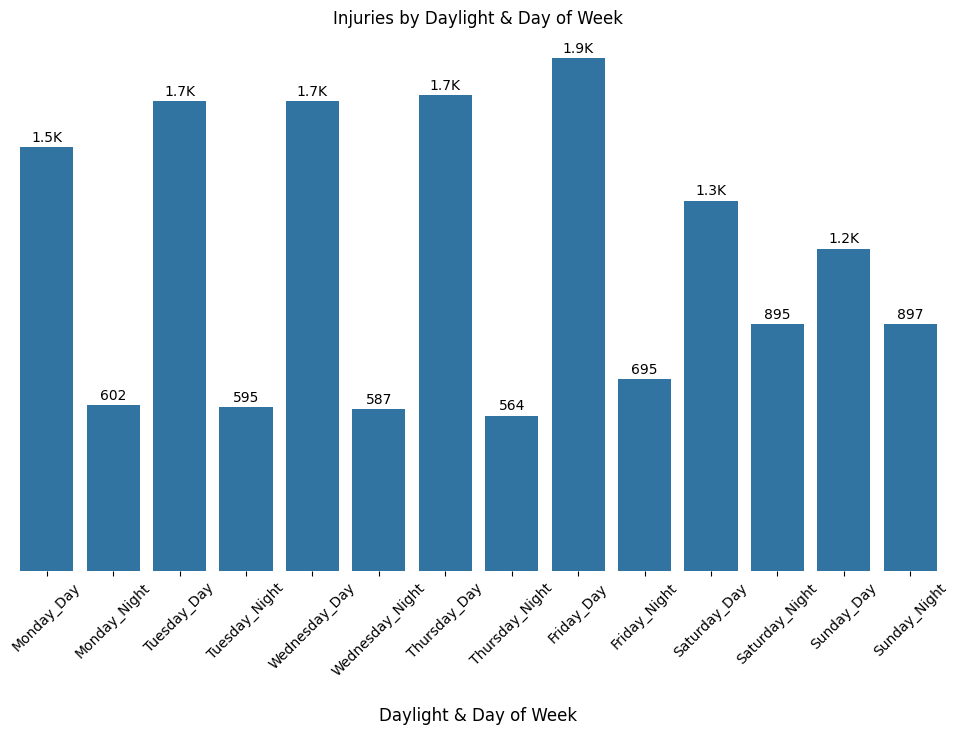

In [23]:
# Aggregate injuries by 'daylight_day_of_week'
agg_daylight_day_of_week = df.groupby('daylight_day_of_week')['injuries'].sum().reset_index()

# Create a function to map 'daylight_day_of_week' to a numerical value for sorting
def map_daylight_day_of_week(daylight_day_of_week):
    day, period = daylight_day_of_week.split('_')
    day_to_num = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
    period_to_num = {'Day': 0, 'Night': 1}
    return day_to_num[day] * 2 + period_to_num[period]

# Add a 'daylight_day_of_week_num' column based on the mapping
agg_daylight_day_of_week['daylight_day_of_week_num'] = agg_daylight_day_of_week['daylight_day_of_week'].apply(map_daylight_day_of_week)

# Sort the DataFrame based on 'daylight_day_of_week_num'
agg_daylight_day_of_week_sorted = agg_daylight_day_of_week.sort_values('daylight_day_of_week_num')

# Plot using the customized_barplot_v4 function
vis.customized_barplot_v4(x='daylight_day_of_week', y='injuries', data=agg_daylight_day_of_week_sorted, 
                      title='Injuries by Daylight & Day of Week', xlabel='Daylight & Day of Week', 
                      sort_data=False, x_label_rotation=45, bar_font_size=10, figsize=(12, 7), 
                      single_color="#1f77b4")


In [24]:
print("\nChi-Square Test for 'daylight_day_of_week':")
exp.chi_square_test(df, 'injuries', 'daylight_day_of_week')



Chi-Square Test for 'daylight_day_of_week':
p-value: 2.1339268396194903e-08
r-value: 0.04

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


### Borough
**Null Hypothesis**: The borough in which the crash occurs is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The borough in which the crash occurs is not independent of the occurrence of injuries in vehicle crashes.


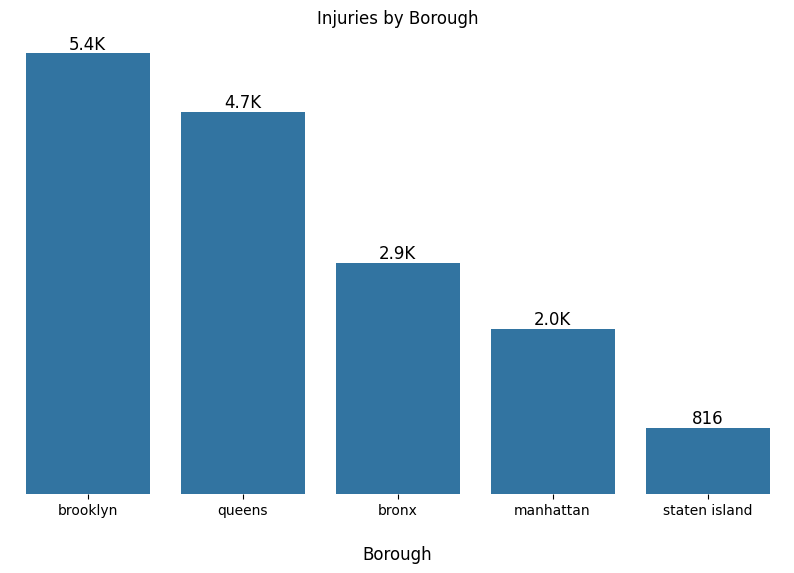

In [25]:
# Aggregate the data for the new location-based features
agg_borough = df.groupby('borough')['injuries'].sum().reset_index()

# Generate bar plots for the new location-based features
vis.customized_barplot_v4(x='borough', y='injuries', data=agg_borough, 
                      title='Injuries by Borough', xlabel='Borough', single_color="#1f77b4")

In [26]:
# Conduct Chi-Square Tests for the new location-based features
print("Chi-Square Test for 'borough':")
exp.chi_square_test(df, 'injuries', 'borough')


Chi-Square Test for 'borough':
p-value: 3.492703421519629e-67
r-value: 0.08

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


### ZIP Code
**Null Hypothesis**: The ZIP code in which the crash occurs is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The ZIP code in which the crash occurs is not independent of the occurrence of injuries in vehicle crashes.


In [27]:
import json
import geopandas as gpd
import folium

# Aggregate data by ZIP code, calculating the mean latitude and longitude and summing the injuries
# agg_zip_geo = df.groupby('zip_code').agg({
#     'latitude': 'mean',
#     'longitude': 'mean',
#     'injuries': 'sum'
# }).reset_index()

agg_zip_geo = df.groupby('zip_code')['injuries'].sum().reset_index()

geo_df = gpd.read_file('new-york-zip-codes-_1604.geojson')
    
# Convert ZCTA5CE10 to integer for merging
geo_df['ZCTA5CE10'] = geo_df['ZCTA5CE10'].astype(int)

# Merge the GeoDataFrame with the original DataFrame on ZIP code
merged_df = geo_df.merge(agg_zip_geo, left_on="ZCTA5CE10", right_on="zip_code")

# Create a Folium map centered around NYC
m_zip_geo = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add the GeoJSON layer to the map
folium.Choropleth(
    geo_data=merged_df,
    name='choropleth',
    data=merged_df,
    columns=['ZCTA5CE10', 'injuries'],
    key_on='feature.properties.ZCTA5CE10',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Injury Counts'
).add_to(m_zip_geo)

# Save the map to a file
#map_file_path = "m_zip_geo"
# m_zip_geo.save(map_file_path)
m_zip_geo
#map_file_path

# https://cartographyvectors.com/map/1604-new-york-zip-codes

In [28]:
# Conduct Chi-Square Test for 'zip_code'
print("Chi-Square Test for 'zip_code':")
exp.chi_square_test(df, 'injuries', 'zip_code')


Chi-Square Test for 'zip_code':
p-value: 1.7433991398140988e-95
r-value: 0.14

Interpretation:
Reject the null hypothesis.
The r-value suggests a medium effect size.


___
___

## Modeling

___
___

In [29]:
df = w.wrangle_coll_stage3(year_to_retrieve, app_token)

CSV file for 2022 already exists. Loading data from the CSV.


In [30]:
train, val, test = mdl.train_val_test_split(df)

In [31]:
train, val, test = mdl.create_ref_date(train, val, test)

In [32]:
from sklearn.preprocessing import TargetEncoder

# Initialize the TargetEncoder
target_encoder = TargetEncoder()

# Fit on the train dataset and transform all datasets
train['zip_code_encoded'] = target_encoder.fit_transform(train[['zip_code']], train['injuries'])
val['zip_code_encoded'] = target_encoder.transform(val[['zip_code']])
test['zip_code_encoded'] = target_encoder.transform(test[['zip_code']])

# Drop the original 'zip_code' column
train.drop('zip_code', axis=1, inplace=True)
val.drop('zip_code', axis=1, inplace=True)
test.drop('zip_code', axis=1, inplace=True)

# Show the first few rows of the transformed datasets
train.head()

,latitude,longitude,on_street_name,borough,injuries,factors_subcat_vehicles,factors_category_vehicles,vehicles,hour_of_day,day_of_week,month,daylight,daylight_day_of_week,time_since_ref_date,zip_code_encoded
19414,40.687553,-73.91868,broadway,brooklyn,False,unspecified,unspecified,two-wheelers_to_commercial,14,Friday,September,True,Friday_Day,258,0.322281
38015,40.724888,-73.89899,perry avenue,queens,False,unspecified,unspecified,personal_to_personal,17,Sunday,May,True,Sunday_Day,148,0.379381
53168,40.651104,-73.94381,church avenue,brooklyn,True,unspecified,unspecified,personal_to_personal,22,Friday,December,False,Friday_Night,349,0.426624
17572,40.751972,-73.93197,northern boulevard,queens,False,driving violations,driver_related,other_to_two-wheelers,21,Wednesday,August,False,Wednesday_Night,235,0.363792
24986,40.733280,-73.91078,58th street,queens,False,environmental,non_driver_related,commercial_to_personal,13,Wednesday,November,True,Wednesday_Day,333,0.399074


In [33]:
import numpy as np

# Apply sine and cosine transformations to 'hour_of_day'
train['hour_of_day_sin'] = np.sin(2 * np.pi * train['hour_of_day'] / 24)
train['hour_of_day_cos'] = np.cos(2 * np.pi * train['hour_of_day'] / 24)

val['hour_of_day_sin'] = np.sin(2 * np.pi * val['hour_of_day'] / 24)
val['hour_of_day_cos'] = np.cos(2 * np.pi * val['hour_of_day'] / 24)

test['hour_of_day_sin'] = np.sin(2 * np.pi * test['hour_of_day'] / 24)
test['hour_of_day_cos'] = np.cos(2 * np.pi * test['hour_of_day'] / 24)

# Drop the original 'hour_of_day' column
train.drop('hour_of_day', axis=1, inplace=True)
val.drop('hour_of_day', axis=1, inplace=True)
test.drop('hour_of_day', axis=1, inplace=True)

# Show the first few rows of the transformed datasets
train[['hour_of_day_sin', 'hour_of_day_cos']].head()

,hour_of_day_sin,hour_of_day_cos
19414,-0.500000,-0.866025
38015,-0.965926,-0.258819
53168,-0.500000,0.866025
17572,-0.707107,0.707107
24986,-0.258819,-0.965926


In [34]:
# Apply target encoding to the 'on_street_name' column
train['on_street_name_encoded'] = target_encoder.fit_transform(train[['on_street_name']], train['injuries'])
val['on_street_name_encoded'] = target_encoder.transform(val[['on_street_name']])
test['on_street_name_encoded'] = target_encoder.transform(test[['on_street_name']])

# Drop the original 'on_street_name' column
train.drop('on_street_name', axis=1, inplace=True)
val.drop('on_street_name', axis=1, inplace=True)
test.drop('on_street_name', axis=1, inplace=True)

# Show the first few rows of the transformed datasets
train[['on_street_name_encoded']].head()

,on_street_name_encoded
19414,0.388552
38015,0.000000
53168,0.497353
17572,0.439476
24986,0.216335


In [35]:
# Fit the encoder on the training data and transform both train and val data.
train['vehicles_encoded'] = target_encoder.fit_transform(train[['vehicles']], train['injuries'])
val['vehicles_encoded'] = target_encoder.transform(val[['vehicles']])
test['vehicles_encoded'] = target_encoder.transform(test[['vehicles']])

# # Drop the original 'vehicles' column
# train.drop(['vehicles'], axis=1, inplace=True)
# val.drop(['vehicles'], axis=1, inplace=True)
# test.drop(['vehicles'], axis=1, inplace=True)

# Show the first few rows of the transformed datasets
train[['vehicles_encoded']].head()

,vehicles_encoded
19414,0.683192
38015,0.327811
53168,0.328331
17572,0.459822
24986,0.264208


In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Adding a small buffer around these
latitude_min, latitude_max = 40.0, 41.0
longitude_min, longitude_max = -75.0, -73.0

# Calculate the overall minimum and maximum values based on these boundaries
overall_min = min(latitude_min, longitude_min)
overall_max = max(latitude_max, longitude_max)

# Apply Min-Max scaling with the common scaling factor
def minmax_scale_with_aspect(value, overall_min, overall_max):
    return (value - overall_min) / (overall_max - overall_min)

# Re-apply Min-Max scaling with the new scaling factor
for col in ['latitude', 'longitude']:
    train[col + '_scaled'] = minmax_scale_with_aspect(train[col], overall_min, overall_max)
    val[col + '_scaled'] = minmax_scale_with_aspect(val[col], overall_min, overall_max)
    test[col + '_scaled'] = minmax_scale_with_aspect(test[col], overall_min, overall_max)

# Drop the original 'on_street_name' column
train.drop('latitude', axis=1, inplace=True)
train.drop('longitude', axis=1, inplace=True)
val.drop('latitude', axis=1, inplace=True)
val.drop('longitude', axis=1, inplace=True)
test.drop('latitude', axis=1, inplace=True)
test.drop('longitude', axis=1, inplace=True)

# Apply Min-Max Scaling to 'time_since_ref_date'
train['time_since_ref_date'] = minmax_scaler.fit_transform(train[['time_since_ref_date']])
val['time_since_ref_date'] = minmax_scaler.transform(val[['time_since_ref_date']])
test['time_since_ref_date'] = minmax_scaler.transform(test[['time_since_ref_date']])

# Show the first few rows of the transformed datasets
train[['time_since_ref_date']].head()

,time_since_ref_date
19414,0.708791
38015,0.406593
53168,0.958791
17572,0.645604
24986,0.914835


In [37]:
# Drop the original 'on_street_name' column
train.drop('factors_category_vehicles', axis=1, inplace=True)
val.drop('factors_category_vehicles', axis=1, inplace=True)
test.drop('factors_category_vehicles', axis=1, inplace=True)

# Drop the original 'on_street_name' column
train.drop('day_of_week', axis=1, inplace=True)
val.drop('day_of_week', axis=1, inplace=True)
test.drop('day_of_week', axis=1, inplace=True)

# Drop the original 'on_street_name' column
train.drop('daylight', axis=1, inplace=True)
val.drop('daylight', axis=1, inplace=True)
test.drop('daylight', axis=1, inplace=True)

In [38]:
train.head()

,borough,injuries,factors_subcat_vehicles,vehicles,month,daylight_day_of_week,time_since_ref_date,zip_code_encoded,hour_of_day_sin,hour_of_day_cos,on_street_name_encoded,vehicles_encoded,latitude_scaled,longitude_scaled
19414,brooklyn,False,unspecified,two-wheelers_to_commercial,September,Friday_Day,0.708791,0.322281,-0.500000,-0.866025,0.388552,0.683192,0.997306,0.009322
38015,queens,False,unspecified,personal_to_personal,May,Sunday_Day,0.406593,0.379381,-0.965926,-0.258819,0.000000,0.327811,0.997628,0.009491
53168,brooklyn,True,unspecified,personal_to_personal,December,Friday_Night,0.958791,0.426624,-0.500000,0.866025,0.497353,0.328331,0.996992,0.009105
17572,queens,False,driving violations,other_to_two-wheelers,August,Wednesday_Night,0.645604,0.363792,-0.707107,0.707107,0.439476,0.459822,0.997862,0.009207
24986,queens,False,environmental,commercial_to_personal,November,Wednesday_Day,0.914835,0.399074,-0.258819,-0.965926,0.216335,0.264208,0.997701,0.009390


In [39]:
# Apply one-hot encoding to the remaining categorical columns
categorical_columns = ['borough', 'factors_subcat_vehicles', 
                       'vehicles', 'month', 'daylight_day_of_week'] #'vehicles', 'factors_category_vehicles, day_of_week

train = pd.get_dummies(train, columns=categorical_columns, drop_first=True)
val = pd.get_dummies(val, columns=categorical_columns, drop_first=True)
test = pd.get_dummies(test, columns=categorical_columns, drop_first=True)

# Align the train, val, and test data to ensure they have the same dummy columns
train, val = train.align(val, join='left', axis=1)
train, test = train.align(test, join='left', axis=1)

# Fill any resulting NaNs in val and test datasets with 0 (for missing columns after one-hot encoding)
val.fillna(0, inplace=True)
test.fillna(0, inplace=True)

# Show the first few rows of the transformed train dataset to verify
train.head()


,injuries,time_since_ref_date,zip_code_encoded,hour_of_day_sin,hour_of_day_cos,on_street_name_encoded,vehicles_encoded,latitude_scaled,longitude_scaled,borough_brooklyn,...,daylight_day_of_week_Saturday_Day,daylight_day_of_week_Saturday_Night,daylight_day_of_week_Sunday_Day,daylight_day_of_week_Sunday_Night,daylight_day_of_week_Thursday_Day,daylight_day_of_week_Thursday_Night,daylight_day_of_week_Tuesday_Day,daylight_day_of_week_Tuesday_Night,daylight_day_of_week_Wednesday_Day,daylight_day_of_week_Wednesday_Night
19414,False,0.708791,0.322281,-0.500000,-0.866025,0.388552,0.683192,0.997306,0.009322,True,...,False,False,False,False,False,False,False,False,False,False
38015,False,0.406593,0.379381,-0.965926,-0.258819,0.000000,0.327811,0.997628,0.009491,False,...,False,False,True,False,False,False,False,False,False,False
53168,True,0.958791,0.426624,-0.500000,0.866025,0.497353,0.328331,0.996992,0.009105,True,...,False,False,False,False,False,False,False,False,False,False
17572,False,0.645604,0.363792,-0.707107,0.707107,0.439476,0.459822,0.997862,0.009207,False,...,False,False,False,False,False,False,False,False,False,True
24986,False,0.914835,0.399074,-0.258819,-0.965926,0.216335,0.264208,0.997701,0.009390,False,...,False,False,False,False,False,False,False,False,True,False


In [40]:
train.to_csv('train_scaled.csv', index=False)
val.to_csv('val_scaled.csv', index=False)
test.to_csv('test_scaled.csv', index=False)

In [41]:
# Calculate the baseline accuracy for the 'injuries' column
most_frequent_class = train['injuries'].value_counts().idxmax()
baseline_accuracy = (train['injuries'] == most_frequent_class).mean()
# baseline_accuracy = round(baseline_accuracy * 100, 1)
baseline_accuracy

0.6709595286733576

In [42]:
from sklearn.metrics import accuracy_score
import pandas as pd

def train_and_evaluate_model(train, val, classifier):
    # Splitting the data into features and target variables
    X_train = train.drop('injuries', axis=1)
    y_train = train['injuries']
    X_val = val.drop('injuries', axis=1)
    y_val = val['injuries']
    
    # Initialize and train the classifier
    clf = classifier
    clf.fit(X_train, y_train)
    
    # Make predictions on train and validation sets
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    
    # Calculate accuracy scores for train and validation sets
    train_accuracy = round(accuracy_score(y_train, y_train_pred) * 100, 1)
    val_accuracy = round(accuracy_score(y_val, y_val_pred) * 100, 1)
    
    # Prepare the results as a DataFrame
    results_df = pd.DataFrame({
        'Model': [clf.__class__.__name__],
        'Train (%)': [train_accuracy],
        'Validation (%)': [val_accuracy]
    })
    
    return results_df, clf

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [44]:
# Initialize classifiers with specific hyperparameters
clf_lr = LogisticRegression(random_state=42, max_iter=1000)
# Evaluate Logistic Regression
result_lr, clf_lr = train_and_evaluate_model(train, val, clf_lr)
result_lr


,Model,Train (%),Validation (%)
0,LogisticRegression,70.0,70.1


In [45]:
# Initialize classifiers with specific hyperparameters
clf_rf = RandomForestClassifier(random_state=42)
# Evaluate Random Forest
result_rf , clf_rf= train_and_evaluate_model(train, val, clf_rf)
result_rf

,Model,Train (%),Validation (%)
0,RandomForestClassifier,100.0,69.6


In [46]:
# Initialize classifiers with specific hyperparameters
clf_gb = GradientBoostingClassifier(random_state=42)
# Evaluate Gradient Boosting
result_gb , clf_gb = train_and_evaluate_model(train, val, clf_gb)
result_gb


,Model,Train (%),Validation (%)
0,GradientBoostingClassifier,70.7,70.2


In [47]:
# Initialize classifiers with specific hyperparameters
clf_svm = SVC(random_state=42)
# Evaluate Support Vector Machine
result_svm , clf_svm = train_and_evaluate_model(train, val, clf_svm)
result_svm

In [ ]:
import numpy as np

def train_and_evaluate_knn(train, val, classifier):
    # Convert DataFrames to C-contiguous NumPy arrays
    X_train = np.ascontiguousarray(train.drop('injuries', axis=1).values)
    y_train = np.ascontiguousarray(train['injuries'].values)
    X_val = np.ascontiguousarray(val.drop('injuries', axis=1).values)
    y_val = np.ascontiguousarray(val['injuries'].values)
    
    # Initialize and train the classifier
    clf = classifier
    clf.fit(X_train, y_train)
    
    # Make predictions on train and validation sets
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    
    # Calculate accuracy scores for train and validation sets
    train_accuracy = round(accuracy_score(y_train, y_train_pred) * 100, 1)
    val_accuracy = round(accuracy_score(y_val, y_val_pred) * 100, 1)
    
    # Prepare the results as a DataFrame
    results_df = pd.DataFrame({
        'Model': [clf.__class__.__name__],
        'Train (%)': [train_accuracy],
        'Validation (%)': [val_accuracy]
    })
    
    return results_df, clf

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN classifier
clf_knn = KNeighborsClassifier()

# Evaluate k-NN
result_knn , clf_knn = train_and_evaluate_knn(train, val, clf_knn)
result_knn

,Model,Train (%),Validation (%)
0,KNeighborsClassifier,75.5,64.8


In [ ]:
# Initialize classifiers with specific hyperparameters
clf_nn = MLPClassifier(random_state=42, max_iter=1000)
# Evaluate Neural Network
result_nn , clf_nn = train_and_evaluate_model(train, val, clf_nn)
result_nn

,Model,Train (%),Validation (%)
0,MLPClassifier,75.9,63.6


In [ ]:
results_list = [result_lr, result_rf, result_gb, result_svm, result_knn, result_nn]
# Concatenate all results into a single DataFrame
results_df = pd.concat(results_list, ignore_index=True)
results_df

,Model,Train (%),Validation (%)
0,LogisticRegression,69.9,70.1
1,RandomForestClassifier,100.0,69.3
2,GradientBoostingClassifier,70.7,70.4
3,SVC,70.5,70.2
4,KNeighborsClassifier,75.5,64.8
5,MLPClassifier,75.9,63.6


In [ ]:
# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
results_list = [result_lr, result_rf, result_gb, result_svm, result_knn, result_nn]
# Concatenate all results into a single DataFrame
results_df = pd.concat(results_list, ignore_index=True)
results_df

,Model,Train (%),Validation (%)
0,LogisticRegression,69.9,70.1
1,RandomForestClassifier,100.0,69.3
2,GradientBoostingClassifier,70.7,70.4
3,SVC,70.5,70.2
4,KNeighborsClassifier,75.5,64.8
5,MLPClassifier,75.9,63.6


In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

def evaluate_model_on_test(test, classifier):
    # Split data into features and target variable
    X_test = test.drop('injuries', axis=1)
    y_test = test['injuries']
    
    # Make predictions on test set
    y_test_pred = classifier.predict(X_test)
    
    # Calculate accuracy score for test set
    test_accuracy = round(accuracy_score(y_test, y_test_pred) * 100, 1)
    
    # Prepare the results as a DataFrame
    results_df = pd.DataFrame({
        'Model': [classifier.__class__.__name__],
        'Test (%)': [test_accuracy]
    })
    
    return results_df

In [ ]:
# Example usage code (you can run this in your environment)
test_result = evaluate_model_on_test(test, clf_lr)
test_result

,Model,Test (%)
0,LogisticRegression,69.7


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def find_best_rf_params(train_data, validate_data, target_variable_name):
    # Separate the features and target variable
    X_train = train_data.drop(target_variable_name, axis=1)
    y_train = train_data[target_variable_name]
    
    X_valid = validate_data.drop(target_variable_name, axis=1)
    y_valid = validate_data[target_variable_name]

    # Define the hyperparameters grid to search
    param_grid = {
        'n_estimators': [10, 50, 100, 200, 300],  # Try different numbers of trees
        'max_depth': [None, 5, 10, 20],     # Maximum depth of trees
        'min_samples_split': [1, 2, 5, 10]  # Minimum samples required to split a node
    }

    # Create a Random Forest classifier
    rf = RandomForestClassifier(random_state=42)

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    return best_params


In [ ]:
# Usage:
best_hyperparameters = find_best_rf_params(train, val, 'injuries')
print("Best Hyperparameters:", best_hyperparameters)

In [93]:
def train_and_evaluate_rf(train, val):
    # Splitting the data into features and target variables
    X_train = train.drop('injuries', axis=1)
    y_train = train['injuries']
    X_val = val.drop('injuries', axis=1)
    y_val = val['injuries']
    
    # Initialize and train the classifier
    clf = RandomForestClassifier(
    random_state=42,
    max_depth=20,
    min_samples_split=10,
    n_estimators=300
    )
    clf.fit(X_train, y_train)
    
    # Make predictions on train and validation sets
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    
    # Calculate accuracy scores for train and validation sets
    train_accuracy = round(accuracy_score(y_train, y_train_pred) * 100, 1)
    val_accuracy = round(accuracy_score(y_val, y_val_pred) * 100, 1)
    
    # Prepare the results as a DataFrame
    results_df = pd.DataFrame({
        'Model': [clf.__class__.__name__],
        'Train (%)': [train_accuracy],
        'Validation (%)': [val_accuracy]
    })
    
    return results_df, clf

In [98]:
results_df, clf_rf = train_and_evaluate_rf(train, val)
results_df

,Model,Train (%),Validation (%)
0,RandomForestClassifier,77.2,70.0
